## spaCy 101: Everything you need to know


https://spacy.io/usage/spacy-101

In [ ]:
### UPDATE PIP to newer version
#step 1
#!python -m pip uninstall pip

#Step 2
#!python -m ensurepip

#Step 3
#!python -m pip install -U pip

In [1]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame as df

currentdir = os.getcwd() + r'/RAW_DATA/NON'
flist = pd.DataFrame()

# create dataframe with list of .docx files in de data map
for r, d, f in os.walk(currentdir):
    for idx, file in enumerate(f):
        if ".docx" in file:
            #print(os.path.join( ' ', file))
            temp = df([file], index = [idx+1])
            flist = pd.concat([flist, temp])   
            
#  Create column label "filename"      
filenameslist = flist.rename(columns={0: 'filename'})

In [2]:
# DISPLAY content of currentdir + filenames  .docx list   
# ROWS index the number of files available
display(currentdir)
display(filenameslist)

'C:\\Users\\rob\\OneDrive - Hogeschool Rotterdam\\HEALTCARE_ZORGTECH\\Code/RAW_DATA/NON'

,filename
1,0100316.docx
2,0200316.docx
3,0806413.docx
4,0859522.docx
5,0864073.docx
6,0879431.docx
7,0879722.docx
8,0890224 .docx


In [3]:
import docx

## SELECT FILENAME + path
currentdir = os.getcwd()
datadir = r'/RAW_DATA/NON/'

## NUMBER selects index of filename in the list 
number = 5
docsel  = currentdir + datadir + filenameslist.filename.iloc[number]

print(docsel)

C:\Users\rob\OneDrive - Hogeschool Rotterdam\HEALTCARE_ZORGTECH\Code/RAW_DATA/NON/0879431.docx


In [4]:
## DOWNLOAD + INSTALL DUTCH language CORPUS (if not installed already)
## https://spacy.io/models/nl
#!python -m spacy download nl_core_news_md
#!python -m spacy download nl_core_news_sm
#!python -m spacy download nl_core_news_lg
#!conda install spacy
#!pip install cupy-cuda111
#!pip install -U --user 'spacy[cuda-autodetect,transformers,lookups]'
#!python -m spacy validate

In [6]:
import pandas as pd
import docx

doc = docx.Document(docsel)
data = ""
fullText = []

for para in doc.paragraphs:
    fullText.append(para.text)
    data = '\n'.join(fullText
    
import spacy
from spacy import displacy

spacy.prefer_gpu()
nlp = spacy.load('nl_core_news_lg')
doc = nlp(data) 
## In jupyter Notebooks Use .render (NIET .serve)
displacy.render(doc, style="ent")

SyntaxError: invalid syntax (756287545.py, line 12)

## Linguistic annotations
#### Tokenization
spaCy provides a variety of linguistic annotations to give you insights into a text’s grammatical structure. This includes the word types, like the parts of speech, and how the words are related to each other. For example, if you’re analyzing text, it makes a huge difference whether a noun is the subject of a sentence, or the object – or whether “google” is used as a verb, or refers to the website or company in a specific context.

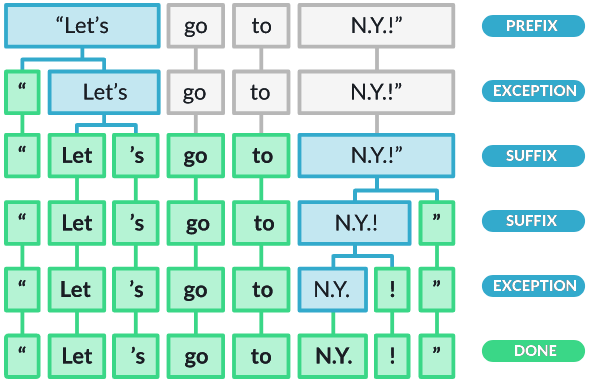

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

In [ ]:
tokens = [(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop) for token in doc]
df = pd.DataFrame(tokens, columns=['text','lemma', 'PoS', 'tag', 'dependency', 'shape', 'alpha', 'stop woord'])
pd.set_option("display.max_rows", None, "display.max_columns", None) # show all rows
df

In [ ]:
#SEARCH for  Named Entity Stundentnummer in text column of dataframe df
sel = (df.text == 'Studentnummer')
nums = np.array( list(np.where(sel)[0]) )
display( nums[0]                 )
display( df[sel]                 )
display( df.iloc [nums[0]+3, 0]  )

## NER Named Entity Recognition

In [ ]:
for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

In [ ]:
entities = [(e.label_,e.text) for e in doc.ents]
df = pd.DataFrame(entities, columns=['Entity','Identified'])

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(df)

# Select 

In [ ]:
sel = (df.Entity == 'PERSON')
df[sel] 

In [ ]:
sel = (df.Entity == 'CARDINAL')
df[sel] 